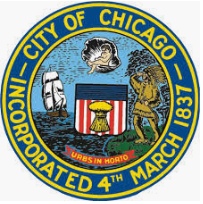

# ETL Project ~ City of Chicago Food Inspections 

## 1. Extract

### 1.1 Extracting Data, from API (JSON) to Pandas

In [22]:
# Dependencies for API access and parsing
#----------------------------------------
import pandas as pd
import requests
import json


In [23]:
# URL that gives access to data
#----------------------------------------
url = 'https://data.cityofchicago.org/resource/cwig-ma7x.json?$limit=150000'


In [24]:
print(requests.get(url))

<Response [200]>


In [4]:
# Preview content
#---------------------------------------
print(requests.get(url).json())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
# Pretty Print the output of the JSON
#-----------------------------------------
response = requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [25]:
# Turn JSON 'response' into a Pandas DataFrame
#-----------------------------------------
df = pd.DataFrame(response)
df.head()

,:@computed_region_43wa_7qmu,:@computed_region_6mkv_f3dw,:@computed_region_awaf_s7ux,:@computed_region_bdys_3d7i,:@computed_region_vrxf_vc4k,address,aka_name,city,dba_name,facility_type,...,inspection_type,latitude,license_,location,longitude,results,risk,state,violations,zip
0,5,22528,3,52,10,1959 W HOWARD ST,POPEYES,CHICAGO,POPEYE'S #831,Restaurant,...,Complaint Re-Inspection,42.0193331123976,2594606,"{'type': 'Point', 'coordinates': [-87.68002153...",-87.68002153080553,Pass w/ Conditions,Risk 1 (High),IL,2. CITY OF CHICAGO FOOD SERVICE SANITATION CER...,60626
1,20,21538,2,214,16,4311-4315 N KEDZIE AVE,EL MICHOACANITO,CHICAGO,EL MICHOACANITO,Restaurant,...,Canvass,41.95974034065365,2385718,"{'type': 'Point', 'coordinates': [-87.70805402...",-87.70805402090488,Pass w/ Conditions,Risk 1 (High),IL,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",60618
2,12,22535,15,74,23,3740 W BELDEN AVE,JEHOVAH LUTHERAN GOOD SHEPHERD CHRISTIAN ACADEMY,CHICAGO,GOOD SHEPHERD CHRISTIAN ACADEMY,School,...,Canvass,41.922832100620326,3808691,"{'type': 'Point', 'coordinates': [-87.72106220...",-87.72106220348968,Fail,Risk 3 (Low),IL,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",60647
3,12,21849,28,120,14,3830 W LAWRENCE AVE,ROJO GUSANO,CHICAGO,ROJO GUSANO,Restaurant,...,Canvass,41.968390431264375,1305286,"{'type': 'Point', 'coordinates': [-87.72444785...",-87.72444785924317,No Entry,Risk 1 (High),IL,NaN,60625
4,18,21538,13,613,46,3900 N LEAVITT ST,ST BENEDICT HIGH SCHOOL,CHICAGO,ST. BENEDICT HIGH SCHOOL,School,...,Canvass,41.9523567935493,1878447,"{'type': 'Point', 'coordinates': [-87.68370683...",-87.68370683817736,Pass,Risk 1 (High),IL,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,60618


## 2. Transform

### 2.1 Column Selection / Formatting / Editing

In [26]:
# Get column names
#-----------------------------------
df.columns

Index([':@computed_region_43wa_7qmu', ':@computed_region_6mkv_f3dw',
       ':@computed_region_awaf_s7ux', ':@computed_region_bdys_3d7i',
       ':@computed_region_vrxf_vc4k', 'address', 'aka_name', 'city',
       'dba_name', 'facility_type', 'inspection_date', 'inspection_id',
       'inspection_type', 'latitude', 'license_', 'location', 'longitude',
       'results', 'risk', 'state', 'violations', 'zip'],
      dtype='object')

In [27]:
#Select useful columns
#-----------------------------------
df = df[['dba_name', 'license_', 'facility_type',
       'risk', 'address', 'zip', 'inspection_date',
       'inspection_type', 'results', 'latitude', 'longitude']]

In [28]:
# Change column names
df.rename(columns={'dba_name': 'business_name', 'license_': 'license'}, inplace=True)
df.head()

,business_name,license,facility_type,risk,address,zip,inspection_date,inspection_type,results,latitude,longitude
0,POPEYE'S #831,2594606,Restaurant,Risk 1 (High),1959 W HOWARD ST,60626,2019-02-21T00:00:00.000,Complaint Re-Inspection,Pass w/ Conditions,42.0193331123976,-87.68002153080553
1,EL MICHOACANITO,2385718,Restaurant,Risk 1 (High),4311-4315 N KEDZIE AVE,60618,2019-02-21T00:00:00.000,Canvass,Pass w/ Conditions,41.95974034065365,-87.70805402090488
2,GOOD SHEPHERD CHRISTIAN ACADEMY,3808691,School,Risk 3 (Low),3740 W BELDEN AVE,60647,2019-02-21T00:00:00.000,Canvass,Fail,41.922832100620326,-87.72106220348968
3,ROJO GUSANO,1305286,Restaurant,Risk 1 (High),3830 W LAWRENCE AVE,60625,2019-02-21T00:00:00.000,Canvass,No Entry,41.968390431264375,-87.72444785924317
4,ST. BENEDICT HIGH SCHOOL,1878447,School,Risk 1 (High),3900 N LEAVITT ST,60618,2019-02-21T00:00:00.000,Canvass,Pass,41.9523567935493,-87.68370683817736


### 2.2 Handling Missing Data

In [29]:
#Print data shape
#---------------------------------------
df.shape

(150000, 11)

In [30]:

# Diagnose missing data (%)
#---------------------------------------
percent_missing = df.isnull().sum()/ len(df) * 100
percent_missing

business_name      0.000000
license            0.008000
facility_type      2.289333
risk               0.028667
address            0.000000
zip                0.032000
inspection_date    0.000000
inspection_type    0.000667
results            0.000000
latitude           0.348000
longitude          0.348000
dtype: float64

In [31]:
# As the percentage of missing data is small, we'll just get rid of those. 
#-------------------------------------------------------------------------
inspections_complete = df.dropna()
# Review the remaining data
#---------------------------------------
inspections_complete.shape

(145990, 11)

In [32]:
# Confirm we have complete data
#---------------------------------------
new_percent_missing = inspections_complete.isnull().sum()/ len(inspections_complete) * 100
new_percent_missing

business_name      0.0
license            0.0
facility_type      0.0
risk               0.0
address            0.0
zip                0.0
inspection_date    0.0
inspection_type    0.0
results            0.0
latitude           0.0
longitude          0.0
dtype: float64

In [33]:
inspections_complete.head(2)

,business_name,license,facility_type,risk,address,zip,inspection_date,inspection_type,results,latitude,longitude
0,POPEYE'S #831,2594606,Restaurant,Risk 1 (High),1959 W HOWARD ST,60626,2019-02-21T00:00:00.000,Complaint Re-Inspection,Pass w/ Conditions,42.0193331123976,-87.68002153080553
1,EL MICHOACANITO,2385718,Restaurant,Risk 1 (High),4311-4315 N KEDZIE AVE,60618,2019-02-21T00:00:00.000,Canvass,Pass w/ Conditions,41.95974034065365,-87.70805402090488


### 2.3 Formatting Date Time

In [39]:
# The Inspection Data column needs formating
import numpy as np
split = inspections_complete['inspection_date'].str.split('T').str[0]
split.head()

0    2019-02-21
1    2019-02-21
2    2019-02-21
3    2019-02-21
4    2019-02-21
Name: inspection_date, dtype: object

In [40]:
inspections_complete['date'] = split
inspections_complete.head()

C:\Users\agarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,business_name,license,facility_type,risk,address,zip,inspection_type,results,latitude,longitude,inspection_date,date
0,POPEYE'S #831,2594606,Restaurant,Risk 1 (High),1959 W HOWARD ST,60626,Complaint Re-Inspection,Pass w/ Conditions,42.0193331123976,-87.68002153080553,2019-02-21,2019-02-21
1,EL MICHOACANITO,2385718,Restaurant,Risk 1 (High),4311-4315 N KEDZIE AVE,60618,Canvass,Pass w/ Conditions,41.95974034065365,-87.70805402090488,2019-02-21,2019-02-21
2,GOOD SHEPHERD CHRISTIAN ACADEMY,3808691,School,Risk 3 (Low),3740 W BELDEN AVE,60647,Canvass,Fail,41.922832100620326,-87.72106220348968,2019-02-21,2019-02-21
3,ROJO GUSANO,1305286,Restaurant,Risk 1 (High),3830 W LAWRENCE AVE,60625,Canvass,No Entry,41.968390431264375,-87.72444785924317,2019-02-21,2019-02-21
4,ST. BENEDICT HIGH SCHOOL,1878447,School,Risk 1 (High),3900 N LEAVITT ST,60618,Canvass,Pass,41.9523567935493,-87.68370683817736,2019-02-21,2019-02-21


In [41]:
# Now with the new 'Date' column, we can get rid fo the old 'Inspection Date'
#----------------------------------------------------------------------------
del inspections_complete['inspection_date']

#Change the name of 'Date' for 'Inspection Date', this way we keep the old name with the new format
#--------------------------------------------------------------------------------------------------
inspections_complete.rename(columns={'date': 'inspection_date'}, inplace=True)
# Review data frame
inspections_complete.head()

C:\Users\agarb\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,business_name,license,facility_type,risk,address,zip,inspection_type,results,latitude,longitude,inspection_date
0,POPEYE'S #831,2594606,Restaurant,Risk 1 (High),1959 W HOWARD ST,60626,Complaint Re-Inspection,Pass w/ Conditions,42.0193331123976,-87.68002153080553,2019-02-21
1,EL MICHOACANITO,2385718,Restaurant,Risk 1 (High),4311-4315 N KEDZIE AVE,60618,Canvass,Pass w/ Conditions,41.95974034065365,-87.70805402090488,2019-02-21
2,GOOD SHEPHERD CHRISTIAN ACADEMY,3808691,School,Risk 3 (Low),3740 W BELDEN AVE,60647,Canvass,Fail,41.922832100620326,-87.72106220348968,2019-02-21
3,ROJO GUSANO,1305286,Restaurant,Risk 1 (High),3830 W LAWRENCE AVE,60625,Canvass,No Entry,41.968390431264375,-87.72444785924317,2019-02-21
4,ST. BENEDICT HIGH SCHOOL,1878447,School,Risk 1 (High),3900 N LEAVITT ST,60618,Canvass,Pass,41.9523567935493,-87.68370683817736,2019-02-21


### 2.4 Formatting Data Types

In [37]:
# Inspect the data types
#-----------------------------------------
inspections_complete.dtypes

business_name      object
license            object
facility_type      object
risk               object
address            object
zip                object
inspection_type    object
results            object
latitude           object
longitude          object
inspection_date    object
dtype: object

In [38]:
# Convert Floatings to Strings
#-----------------------------------------
# From Float to Integer (to get rid of the decimal) and then to String.
inspections_complete['license'] = inspections_complete['license'].astype(int)
inspections_complete['license'] = inspections_complete['license'].astype(str)

# From Float to Integer (to get rid of the decimal) and then to String.
inspections_complete['zip'] = inspections_complete['zip'].astype(int)
inspections_complete['zip'] = inspections_complete['zip'].astype(str)

# From Float to String
inspections_complete['latitude'] = inspections_complete['latitude'].astype(str)
inspections_complete['longitude'] = inspections_complete['longitude'].astype(str)

#Confirm datatypes
#-----------------------------------------
inspections_complete.dtypes

C:\Users\agarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\agarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\agarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

business_name      object
license            object
facility_type      object
risk               object
address            object
zip                object
inspection_type    object
results            object
latitude           object
longitude          object
inspection_date    object
dtype: object

In [60]:
# Print results to confirm that License and Zip do not have decimals and that Long and Lat are text. 
inspections_complete.head()

,business_name,license,facility_type,risk,address,zip,inspection_type,results,latitude,longitude,inspection_date
0,POPEYE'S #831,2594606,Restaurant,Risk 1 (High),1959 W HOWARD ST,60626,Complaint Re-Inspection,Pass w/ Conditions,42.0193331123976,-87.68002153080553,2019-02-21
1,EL MICHOACANITO,2385718,Restaurant,Risk 1 (High),4311-4315 N KEDZIE AVE,60618,Canvass,Pass w/ Conditions,41.95974034065365,-87.70805402090488,2019-02-21
2,GOOD SHEPHERD CHRISTIAN ACADEMY,3808691,School,Risk 3 (Low),3740 W BELDEN AVE,60647,Canvass,Fail,41.922832100620326,-87.72106220348968,2019-02-21
3,ROJO GUSANO,1305286,Restaurant,Risk 1 (High),3830 W LAWRENCE AVE,60625,Canvass,No Entry,41.968390431264375,-87.72444785924317,2019-02-21
4,ST. BENEDICT HIGH SCHOOL,1878447,School,Risk 1 (High),3900 N LEAVITT ST,60618,Canvass,Pass,41.9523567935493,-87.68370683817736,2019-02-21


### 2.5 From Pandas DataFrame to SQL

In [62]:
inspections_complete.loc[inspections_complete['business_name'] == 'GIDEON WELLES']


,business_name,license,facility_type,risk,address,zip,inspection_type,results,latitude,longitude,inspection_date
4269,GIDEON WELLES,2391123,Restaurant,Risk 1 (High),4500 N LINCOLN AVE,60625,Canvass Re-Inspection,Pass w/ Conditions,41.96322840151295,-87.6851904429567,2018-10-30
4602,GIDEON WELLES,2391123,Restaurant,Risk 1 (High),4500 N LINCOLN AVE,60625,Canvass,Fail,41.96322840151295,-87.6851904429567,2018-10-23
29136,GIDEON WELLES,2391123,Restaurant,Risk 1 (High),4500 N LINCOLN AVE,60625,Canvass Re-Inspection,Pass w/ Conditions,41.96322840151295,-87.6851904429567,2017-07-06
29465,GIDEON WELLES,2391123,Restaurant,Risk 1 (High),4500 N LINCOLN AVE,60625,Canvass,Fail,41.96322840151295,-87.6851904429567,2017-06-28
54363,GIDEON WELLES,2391123,Restaurant,Risk 1 (High),4500 N LINCOLN AVE,60625,Canvass,Pass w/ Conditions,41.96322840151295,-87.6851904429567,2016-05-27
74199,GIDEON WELLES,2391124,Restaurant,Risk 1 (High),4500 N LINCOLN AVE,60625,License,Pass,41.96322840151295,-87.6851904429567,2015-07-07
74268,GIDEON WELLES,2391123,Restaurant,Risk 1 (High),4500 N LINCOLN AVE,60625,License,Pass,41.96322840151295,-87.6851904429567,2015-07-07
74579,GIDEON WELLES,2391124,Restaurant,Risk 1 (High),4500 N LINCOLN AVE,60625,License,Not Ready,41.96322840151295,-87.6851904429567,2015-06-30
74596,GIDEON WELLES,2391123,Restaurant,Risk 1 (High),4500 N LINCOLN AVE,60625,License,Not Ready,41.96322840151295,-87.6851904429567,2015-06-30


In [67]:
# export results to json file
inspections_complete.to_json('Resources/inspections.json', orient = 'records', lines = True)

In [42]:
#Dependency
#-----------------------------------
from sqlalchemy import create_engine

#Create Engine
#-----------------------------------
engine = create_engine('sqlite://', echo=False)

#Convert Pandas DataFrame into SQL
#-----------------------------------
inspections_complete.to_sql('inspections', con=engine)

#Perform a SQL Query
#-----------------------------------
engine.execute("SELECT Business_Name, Results FROM inspections").fetchall()

[("POPEYE'S #831", 'Pass w/ Conditions'),
 ('EL MICHOACANITO', 'Pass w/ Conditions'),
 ('GOOD SHEPHERD CHRISTIAN ACADEMY', 'Fail'),
 ('ROJO GUSANO', 'No Entry'),
 ('ST. BENEDICT HIGH SCHOOL', 'Pass'),
 ("CAPT'N NEMO", 'Pass w/ Conditions'),
 ('JEHOVAS LUTHERAN CHURCH & SCHOOL', 'Out of Business'),
 ('ST. BENEDICT ELEMENTARY SCHOOL', 'Pass'),
 ('Northwest Middle/Belmont-Cragin', 'Pass'),
 ('WINNIE THE POOH PRESCHOOL', 'Fail'),
 ('LEGAL PREP CHARTER ACADEMY', 'Pass'),
 ('PIZZA HUT # 35190', 'Not Ready'),
 ('FARNSWORTH  SCHOOL', 'Pass'),
 ('MR. POLLO', 'Pass w/ Conditions'),
 ('VELOX COFFEE', 'Pass'),
 ('THE GOLDEN VILLAGE', 'Fail'),
 ('FRAZIER  INTERNATIONAL', 'Pass'),
 ('AL MAIMANI FOOD', 'Pass w/ Conditions'),
 ('GOHYANG FOOD CORPORATION', 'Pass w/ Conditions'),
 ('L&L ACADEMY AND PRESCHOOL LAKEVIEW', 'Pass'),
 ('SOLID GOLD FOOD INC.', 'Out of Business'),
 ('ANNA PURANA FAST FOOD', 'Pass w/ Conditions'),
 ('EXCLUSA ENTERPRISES INC', 'Fail'),
 ("COLUTA'S PIZZA", 'Pass w/ Conditions'),
 